##AdEase Time Series Case Study

'Page' = SPECIFIC NAME _ LANGUAGE.wikipedia.org _ ACCESS TYPE _ ACCESS ORIGIN
example:    2PM_zh.wikipedia.org_all-access_spider

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Exog_Campaign_eng to Exog_Campaign_eng (2)
User uploaded file "Exog_Campaign_eng (2)" with length 1105 bytes


In [3]:
exog_df = pd.read_csv('Exog_Campaign_eng')
exog_df.head()

,Exog
0,0
1,0
2,0
3,0
4,0


In [4]:
exog_df.describe()

,Exog
count,550.000000
mean,0.098182
std,0.297831
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [6]:
train_df = pd.read_csv('/gdrive/My Drive/Colab Notebooks/train_1.csv')
train_df.shape

(145063, 551)

In [7]:
train_df[10:15]

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
10,ASTRO_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,11.0,38.0,85.0,79.0,30.0,14.0,10.0,38.0,12.0,51.0
11,Ahq_e-Sports_Club_zh.wikipedia.org_all-access_...,2.0,1.0,4.0,4.0,2.0,6.0,3.0,6.0,9.0,...,8.0,17.0,18.0,48.0,19.0,14.0,9.0,23.0,11.0,7.0
12,All_your_base_are_belong_to_us_zh.wikipedia.or...,2.0,5.0,5.0,1.0,3.0,3.0,5.0,3.0,17.0,...,5.0,4.0,4.0,5.0,2.0,9.0,7.0,4.0,5.0,0.0
13,AlphaGo_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,13.0,14.0,17.0,19.0,56.0,21.0,13.0,21.0,11.0
14,Android_zh.wikipedia.org_all-access_spider,8.0,27.0,9.0,25.0,25.0,10.0,34.0,22.0,17.0,...,36.0,36.0,46.0,42.0,40.0,40.0,66.0,43.0,38.0,74.0


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [9]:
train_df[:1]

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0


##Handling Missing Values

In [10]:
train_df.isna().sum()

,0
Page,0
2015-07-01,20740
2015-07-02,20816
2015-07-03,20544
2015-07-04,20654
...,...
2016-12-27,3701
2016-12-28,3822
2016-12-29,3826
2016-12-30,3635


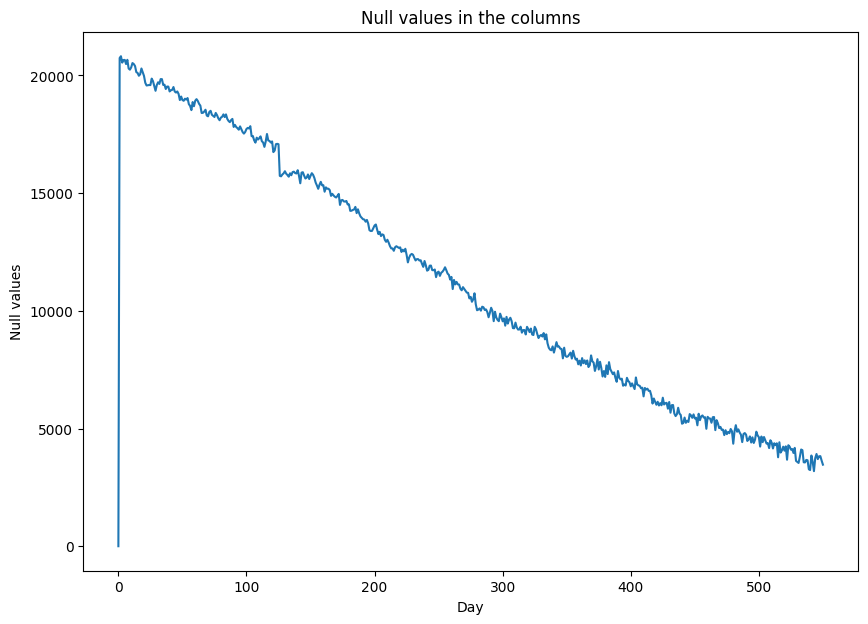

In [11]:
plt.figure(figsize=(10,7))
x_range = [i for i in range(train_df.shape[1])]
plt.xlabel("Day")
plt.ylabel("Null values")
plt.title("Null values in the columns")
plt.plot(x_range, train_df.isna().sum().values)

###Inference :- Null values in the columns indicate that the web page was not available or created during that time. The plot shows a decreasing trend.

###Setting Page as the index

In [12]:
train_df.set_index('Page', inplace=True)

### We can drop the rows that contain all the NULL values.

In [13]:
print("Data shape before dropping null values: ", train_df.shape)
train_df.dropna(axis=0, how='all', inplace=True)
print("Data shape before dropping null values: ", train_df.shape)

Data shape before dropping null values:  (145063, 550)
Data shape before dropping null values:  (144411, 550)


In [14]:
(145063-144411)/145063*100

0.44945988984096563

###Percentage of values dropped is 0.45 % of the dataset.

In [15]:
train_df.isna().sum()

,0
2015-07-01,20088
2015-07-02,20164
2015-07-03,19892
2015-07-04,20002
2015-07-05,20007
...,...
2016-12-27,3049
2016-12-28,3170
2016-12-29,3174
2016-12-30,2983


###We we can further reduce Null values by choosing a threshold value as 350(Around 64%)

In [16]:
train_df=train_df.dropna(thresh = 350)
print(train_df.shape)

(131263, 550)


###Filling the remaining Null values with zeros.

In [17]:
train_df=train_df.fillna(0)

In [18]:
train_df.reset_index(level=0, inplace=True)

###Processing the 'Page' column to get the individual elements like SPECIFIC NAME or Title, LANGUAGE, ACCESS TYPE and ACCESS ORIGIN

In [19]:
# Split the column values and extract parts
temp_df = train_df['Page'].str.split('_', expand=True)
train_df['Title'] = temp_df[0].str.strip()
train_df['Language'] = temp_df[1].str.split('.', expand=True)[0]  # Second part (before '.')
train_df['Access_Type'] = temp_df[2].str.strip()
train_df['Access_Origin'] = temp_df[3].str.strip()

In [20]:
train_df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Title,Language,Access_Type,Access_Origin
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,14.0,20.0,22.0,19.0,18.0,20.0,2NE1,zh,all-access,spider
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,9.0,30.0,52.0,45.0,26.0,20.0,2PM,zh,all-access,spider
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,4.0,4.0,6.0,3.0,4.0,17.0,3C,zh,all-access,spider
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,16.0,11.0,17.0,19.0,10.0,11.0,4minute,zh,all-access,spider
4,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,32.0,19.0,23.0,17.0,17.0,50.0,5566,zh,all-access,spider


In [21]:
train_df['Access_Type'].value_counts()

,count
Access_Type,
all-access,25637
desktop,12920
mobile-web,12251
en.wikipedia.org,11441
de.wikipedia.org,8818
...,...
Midtown,1
2005.jpg,1
MARKET,1


In [22]:
train_df['Access_Origin'].value_counts()

,count
Access_Origin,
all-agents,38244
all-access,23694
spider,12564
mobile-web,11972
desktop,10097
...,...
electoral,1
woman.jpg,1
street,1


In [23]:
train_df['Language'].value_counts()

,count
Language,
ja,17088
zh,13349
de,6942
es,3457
www,3200
...,...
Girardi,1
Miz,1
Kinney,1


In [24]:
train_df['Language'].describe()

,Language
count,131263
unique,14643
top,ja
freq,17088


In [25]:
# Pages proportion by language
train_df["Language"].value_counts()*100/train_df.shape[0]

,count
Language,
ja,13.018139
zh,10.169659
de,5.288619
es,2.633644
www,2.437854
...,...
Girardi,0.000762
Miz,0.000762
Kinney,0.000762


###The web pages are shown in 14643 different languages. Of these the most used language is 'ja' - Japenese, which accounts to 13% of the total pages.



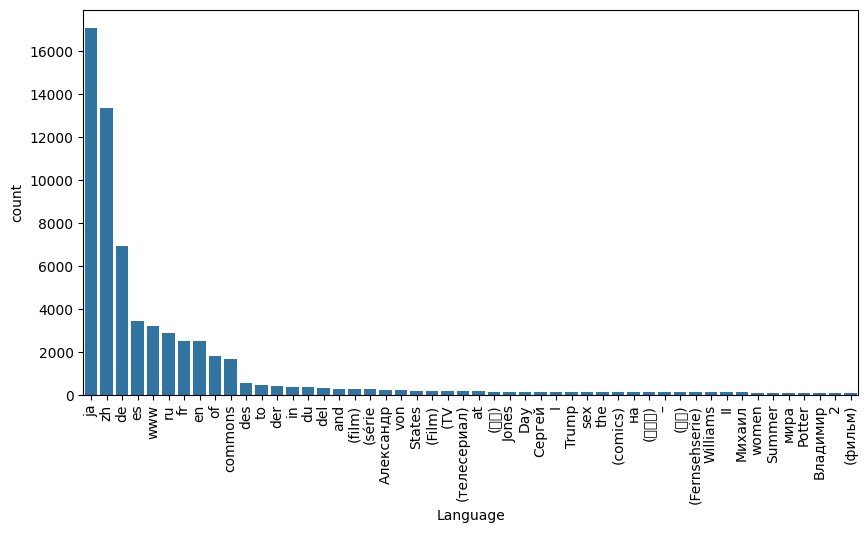

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(data=train_df,x="Language",order=train_df["Language"].value_counts().index[:50])
plt.xticks(rotation=90);

###Japenese , followed by zh - Chinese, de - German, es - Spanish and so on.

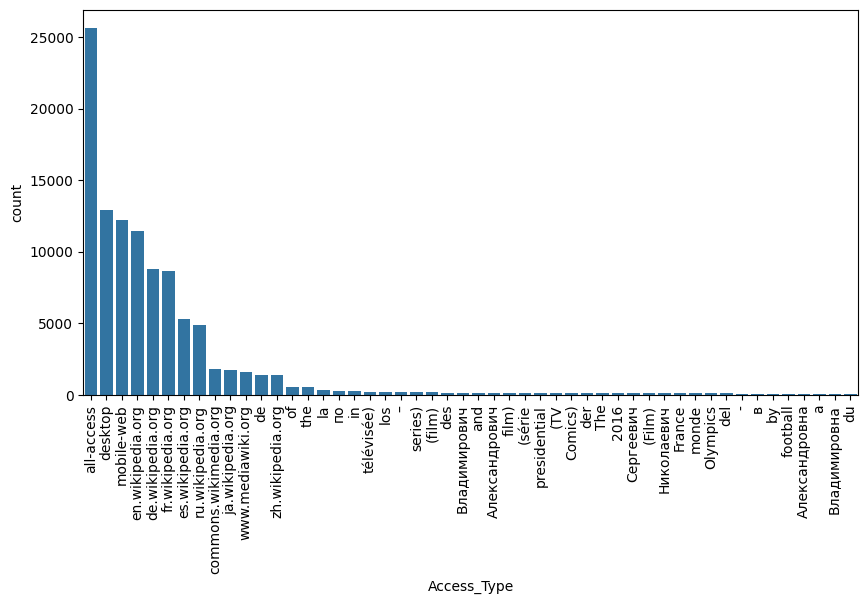

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(data=train_df,x="Access_Type",order=train_df["Access_Type"].value_counts().index[:50])
plt.xticks(rotation=90);

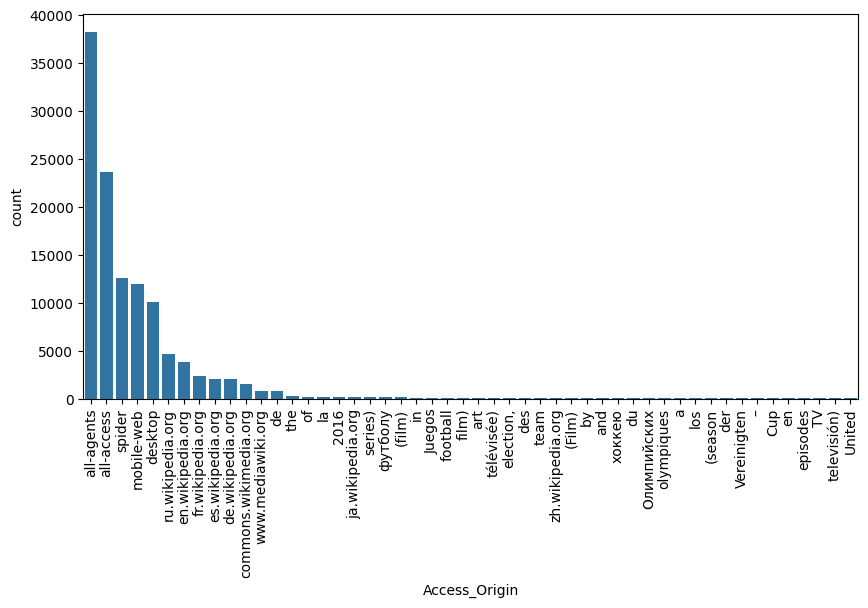

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(data=train_df,x="Access_Origin",order=train_df["Access_Origin"].value_counts().index[:50])
plt.xticks(rotation=90);

- Most popular Access Type is "all-access" followed by "desktop" and "mobile_web".
- Also most popular Access_Origin is "all_agents" followed by "all_access" and "spider".

###Preparing the data in the format suitable for ARIMA Model.

In [29]:
train_df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Title,Language,Access_Type,Access_Origin
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,14.0,20.0,22.0,19.0,18.0,20.0,2NE1,zh,all-access,spider
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,9.0,30.0,52.0,45.0,26.0,20.0,2PM,zh,all-access,spider
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,4.0,4.0,6.0,3.0,4.0,17.0,3C,zh,all-access,spider
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,16.0,11.0,17.0,19.0,10.0,11.0,4minute,zh,all-access,spider
4,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,32.0,19.0,23.0,17.0,17.0,50.0,5566,zh,all-access,spider


In [30]:
temp_df = train_df.drop(['Page', 'Title', 'Access_Type', 'Access_Origin'], axis=1)

In [31]:
temp_df.head()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Language
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0,zh
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0,zh
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0,zh
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0,zh
4,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,7.0,...,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0,zh


In [32]:
df_lang = temp_df.groupby("Language").mean().transpose()
df_lang.head(10)

Language,,"""Chief""","""G""","""Grizzly""","""Sweet","""The",&,'70s,'Blue,'n',...,蘇えりし者,虛偽的假面,誓言的場所,警視庁警備部警護課第四係,赤・緑,鉄血のオルフェンズ,鐵血的孤兒,黄金魂,－The,～戀愛系列～
2015-07-01,122.857143,12.0,0.0,150.0,2.0,261.75,255.418182,183.0,1.0,23.0,...,0.0,0.0,466.0,434.25,169.333333,0.0,0.0,707.333333,0.0,76.25
2015-07-02,101.285714,3.0,0.0,146.0,0.0,212.25,253.872727,178.0,2.0,29.0,...,0.0,0.0,502.0,545.50,137.333333,0.0,0.0,786.333333,0.0,65.25
2015-07-03,117.571429,4.0,0.0,137.0,1.0,185.25,243.654545,219.0,4.0,34.0,...,0.0,0.0,511.0,507.25,176.666667,0.0,0.0,1871.000000,0.0,104.25
2015-07-04,122.285714,12.0,0.0,125.0,5.0,183.25,315.672727,232.0,7.0,28.0,...,0.0,0.0,441.0,666.25,212.666667,0.0,0.0,2490.666667,0.0,94.75
2015-07-05,160.142857,4.0,0.0,139.0,6.0,205.00,288.381818,192.0,3.0,18.0,...,0.0,0.0,350.0,673.75,188.000000,0.0,0.0,1718.666667,0.0,169.75
2015-07-06,190.428571,22.0,0.0,187.0,6.0,250.00,340.381818,395.0,2.0,22.0,...,0.0,0.0,353.0,623.50,149.666667,0.0,0.0,1139.333333,0.0,84.75
2015-07-07,116.571429,3.0,0.0,205.0,3.0,223.50,278.654545,356.0,7.0,45.0,...,0.0,0.0,279.0,559.00,159.666667,0.0,0.0,912.333333,0.0,78.75
2015-07-08,125.000000,7.0,0.0,147.0,4.0,239.50,278.727273,219.0,2.0,26.0,...,0.0,0.0,417.0,550.75,128.333333,0.0,0.0,826.333333,0.0,63.00
2015-07-09,122.000000,15.0,0.0,213.0,5.0,201.75,280.527273,209.0,3.0,34.0,...,0.0,0.0,405.0,535.00,147.000000,0.0,0.0,958.333333,0.0,89.50
2015-07-10,205.571429,9.0,0.0,203.0,2.0,207.00,314.472727,155.0,7.0,25.0,...,0.0,0.0,446.0,438.50,149.000000,0.0,0.0,848.333333,0.0,88.50


In [33]:
df_lang.reset_index(inplace=True)
df_lang.set_index('index', inplace=True)

Text(0, 0.5, 'Views per Page')

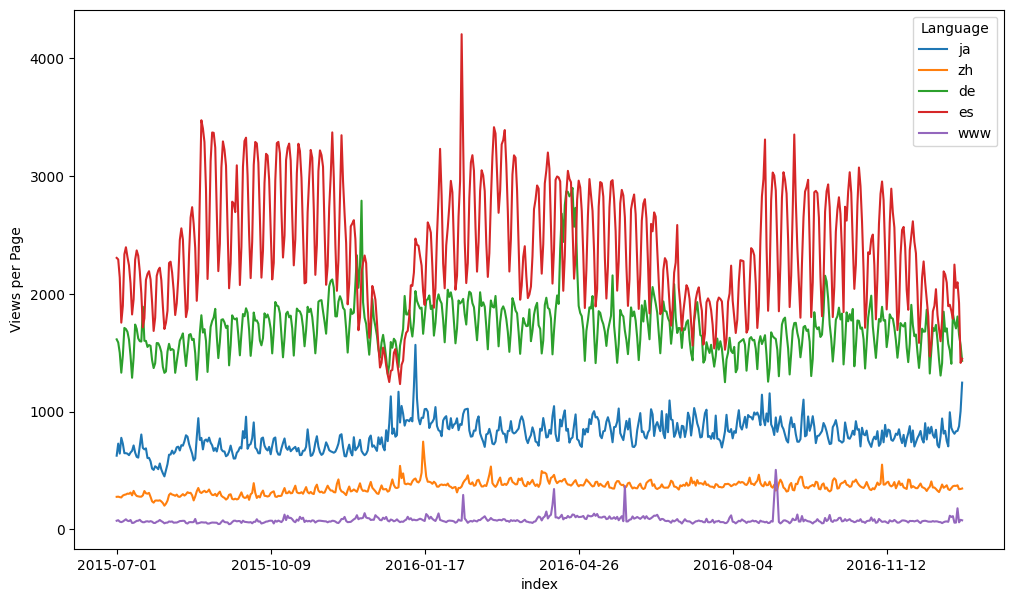

In [100]:
df_lang[['ja','zh','de','es','www']].plot(figsize=(12,7))
plt.ylabel('Views per Page')

##We will consider data for the most popular language 'Japenese' to analyse the trend.

In [35]:
final_df = df_lang[['ja']]

In [36]:
final_df = final_df["ja"].to_frame().reset_index()
final_df.columns = ["Date", "Views"]

In [37]:
final_df['Date'] = pd.to_datetime(final_df['Date'])

In [38]:
final_df.set_index('Date', inplace=True)
final_df.head()

,Views
Date,
2015-07-01,625.480747
2015-07-02,727.903968
2015-07-03,643.385358
2015-07-04,777.382315
2015-07-05,727.564548


In [39]:
plt.rcParams['figure.figsize'] = (15, 6)

<Axes: xlabel='Date'>

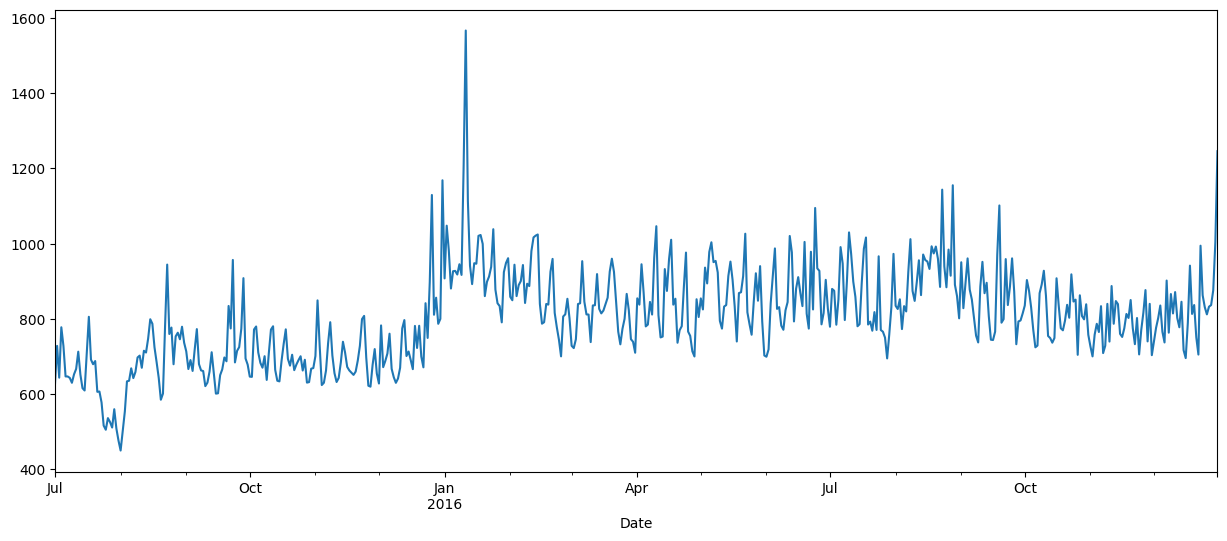

In [40]:
final_df.Views.plot()

##To check for the trend and the seasonality in this time series:

In [41]:
import statsmodels.api as sm
model = sm.tsa.seasonal_decompose(final_df.Views, model='additive')

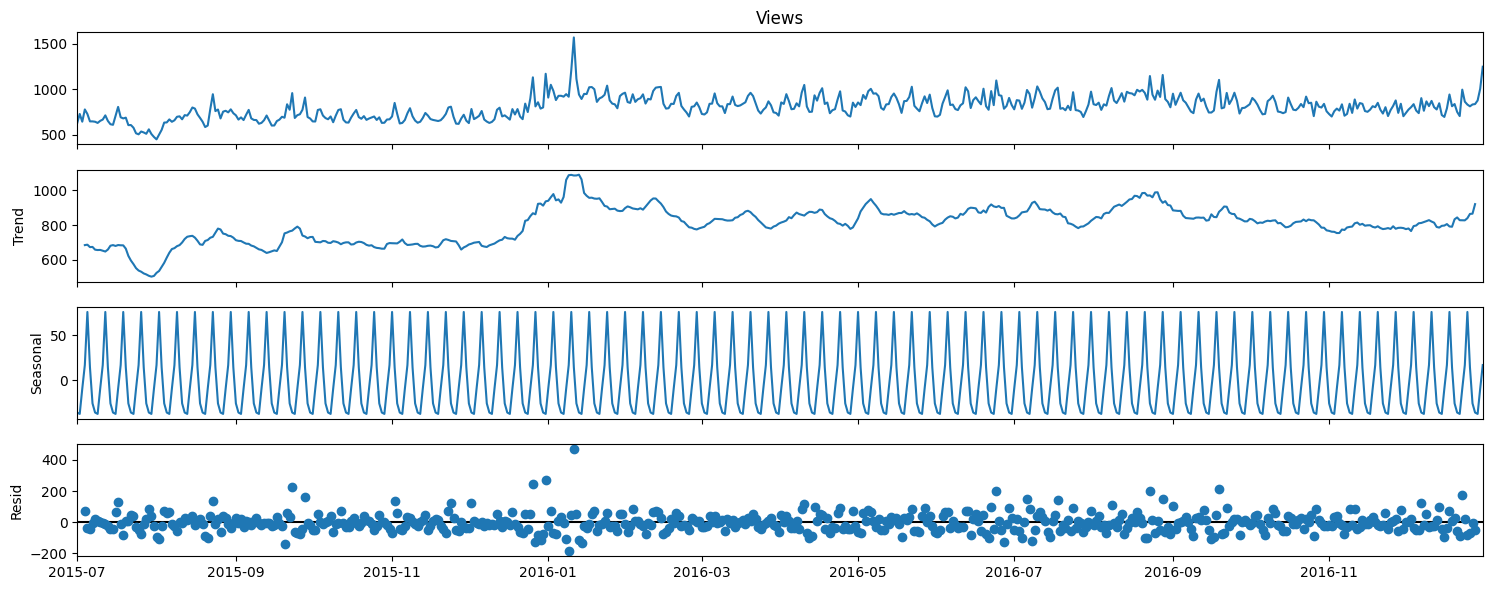

In [42]:
model.plot();


1.   The model shows that there is a slight increasing trend and a seasonality in the data.
2.   The errors seem to be normally distributes with some outliers.



<Axes: xlabel='Date'>

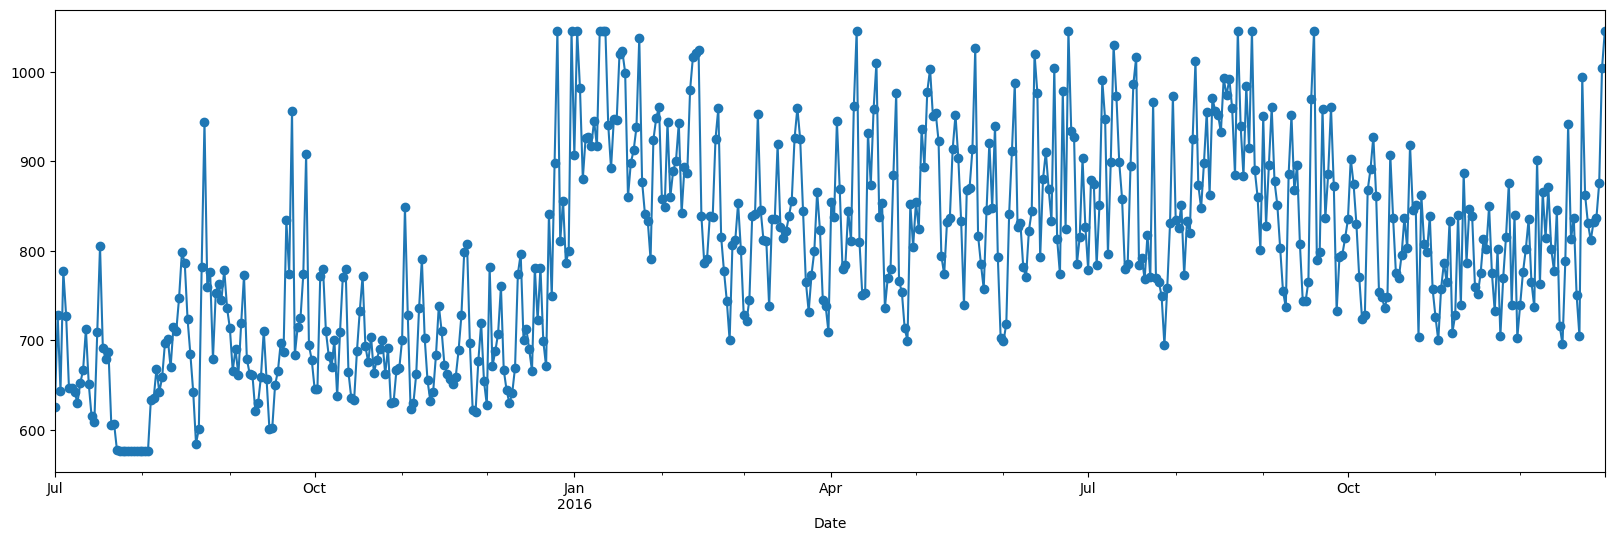

In [43]:
# linear interpolation
final_df.Views = final_df.Views.interpolate(method='linear')

# anomalies - clip quantiles
final_df.Views = final_df.Views.clip(upper=final_df.Views.quantile(0.98), lower=final_df.Views.quantile(0.02))

# plot
final_df.Views.plot(style='-o', figsize=(20,6))

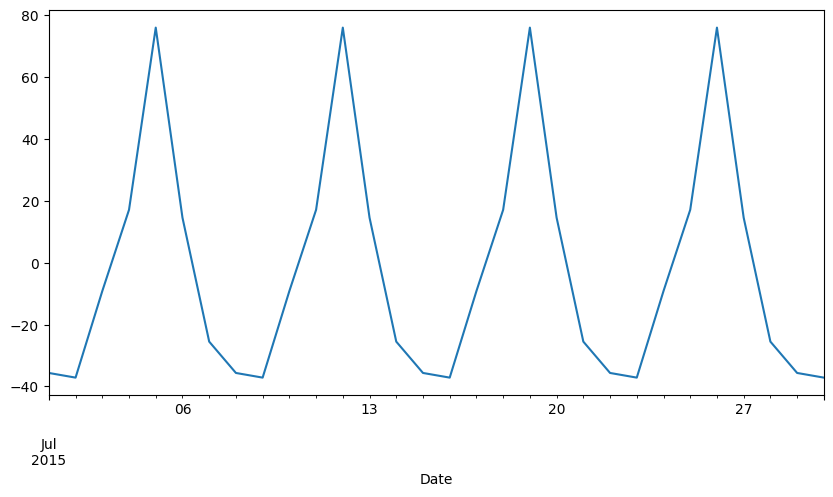

In [44]:
plt.figure(figsize=(10,5))
model.seasonal.head(30).plot();

###There ia a seasonality of 7 days.

In [45]:
def adf_test(dataset):

   pvalue = sm.tsa.stattools.adfuller(dataset)[1]
   if pvalue <= 0.05:
      print('The sequence is Stationary')
   else:
      print('The sequence is not Stationary')

In [46]:
adf_test(final_df.Views)

The sequence is not Stationary


-We see here that the sequence is not stationary. Same can be seen through the decomposed time series plot as well.

###We can make the series stationary by detrending it.

In [47]:
detrend = final_df.Views.diff()

In [48]:
adf_test(detrend.dropna())

The sequence is Stationary


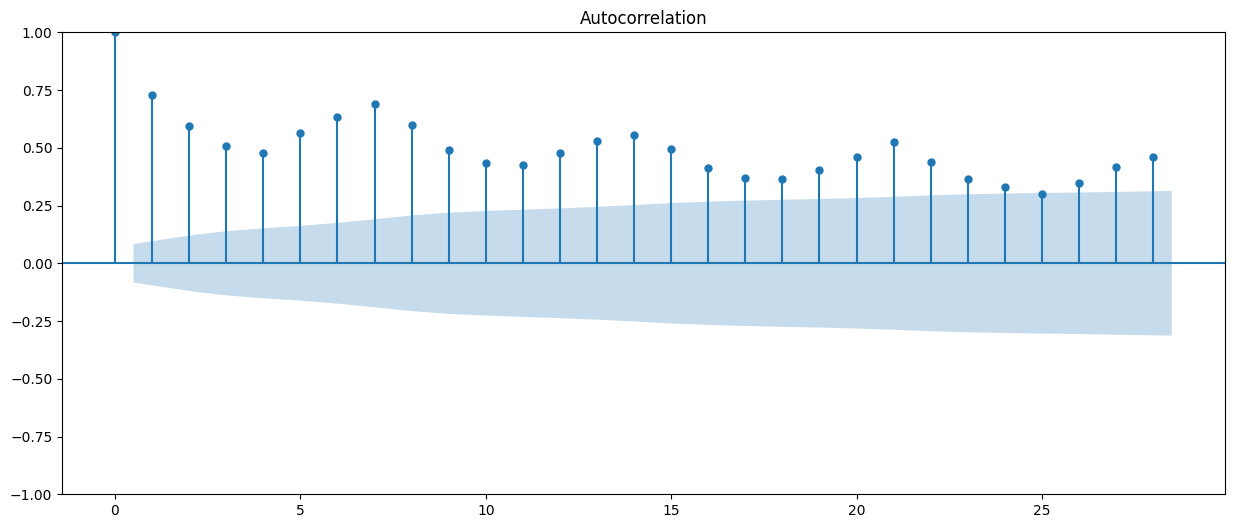

In [49]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(final_df.Views);

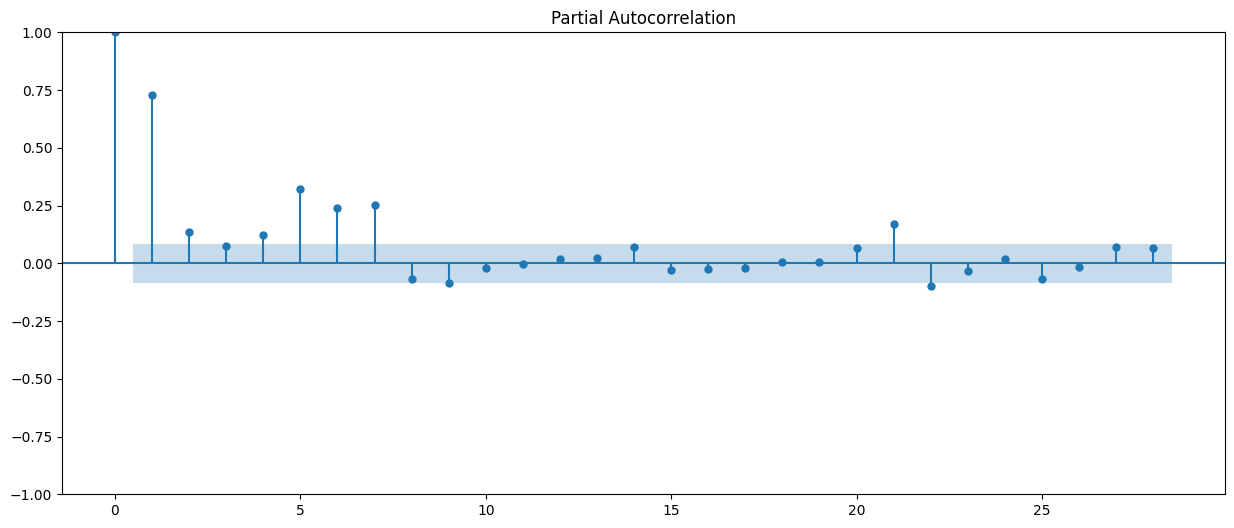

In [50]:
plot_pacf(final_df.Views);

###Creating Performance Metrics

In [51]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)

# Create a function to calculate all metrics
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))

In [52]:
train_max_date = final_df.index[-50]
train_x = final_df.loc[final_df.index < final_df.index[-50]].copy()
test_x = final_df.loc[final_df.index >= final_df.index[-50]].copy()

##Exponential Smoothing

In [53]:
exp_smoothing = sm.tsa.ExponentialSmoothing(train_x,seasonal="add",trend="add")
exp_smoothing = exp_smoothing.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


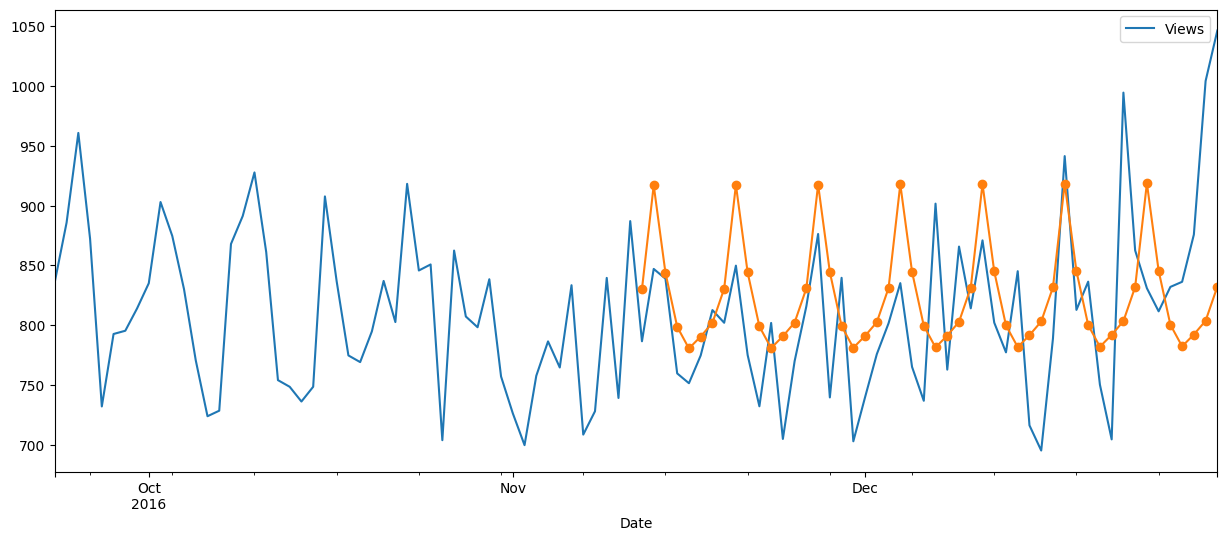

In [54]:
Predicted_val = exp_smoothing.forecast(50)
final_df.tail(100).plot()
Predicted_val.plot(style='-o')

plt.legend();

In [55]:
performance(final_df[-50:],Predicted_val)

MAE : 59.225
RMSE : 74.338
MAPE: 0.072


###Exponential model is able to predict the data with an MAPE of 7%.

##ARIMA

In [56]:
def ARIMA(df,idx,order=(0,0,0)):

    import statsmodels.api as sm

    X_train, X_test = df.iloc[:-idx],df.iloc[-idx:]

    model = sm.tsa.ARIMA(endog=X_train,order=order)
    result = model.fit()

    predTest  = result.forecast(len(X_test))
    final_df.tail(100).plot()
    predTest.plot(style='-o')

    plt.ylabel("Views")
    plt.xlabel("Date")
    plt.legend();

    performance(X_test,predTest)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAE : 56.562
RMSE : 76.011
MAPE: 0.068


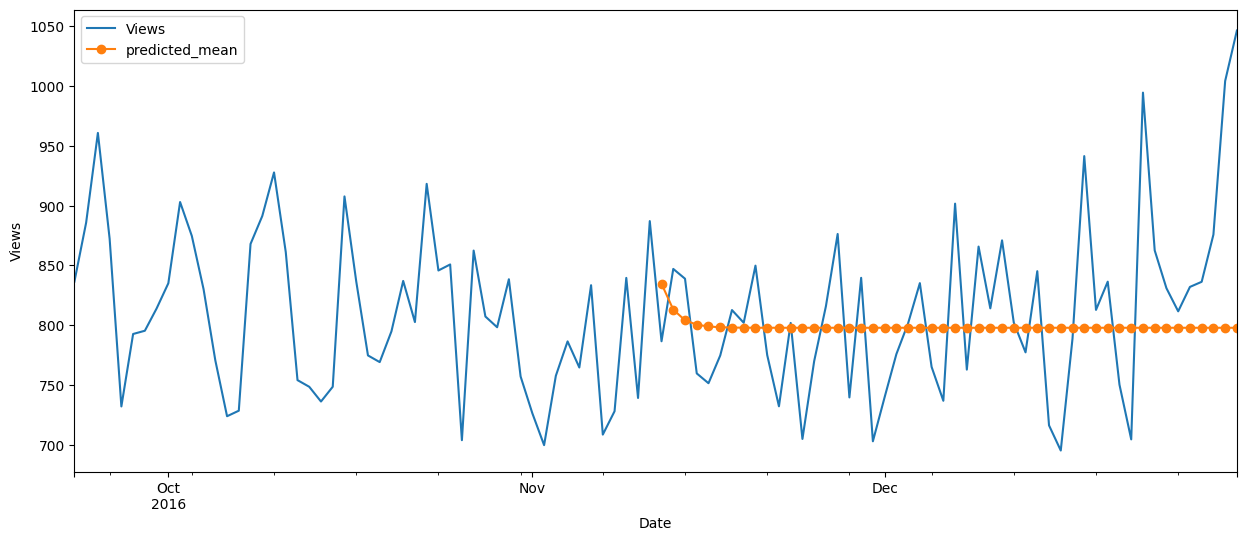

In [57]:
model = ARIMA(final_df,idx = 50,order=(1,1,1))

###ARIMA  model is able to predict the data with an MAPE of 6.8%.

In [74]:
def performance_1(actual, predicted):
    #print('MAE :', round(mae(actual, predicted), 3))
    #print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    #print('MAPE:', round(mape(actual, predicted), 3))
    return round(mape(actual, predicted), 3)

##Finding the best parameters for SARIMA nodel-

In [59]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

train_max_date = final_df.index[-50]
train_x = final_df.loc[final_df.index < final_df.index[-50]].copy()
test_x = final_df.loc[final_df.index >= final_df.index[-50]].copy()

order_list = [[0,1,0],[1,1,1],[1,2,1],[2,1,1],[1,2,2]]
s_order_list = [[1,1,1,7],[1,2,1,7],[2,1,1,7]]

for order in order_list:
    for s_order in s_order_list:

      model = SARIMAX(train_x, order=order, seasonal_order=s_order)
      model = model.fit(disp=False)
      Pred = model.forecast(steps=50)
      #test_x.plot(style='-o')
      print(order, s_order)
      mape_val = performance_1(test_x, Pred)
      print('MAPE:',mape_val)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


[0, 1, 0] [1, 1, 1, 7]
MAPE: 0.153


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


[0, 1, 0] [1, 2, 1, 7]
MAPE: 0.326


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


[0, 1, 0] [2, 1, 1, 7]
MAPE: 0.152


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


[1, 1, 1] [1, 1, 1, 7]
MAPE: 0.064


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


[1, 1, 1] [1, 2, 1, 7]
MAPE: 0.078


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


[1, 1, 1] [2, 1, 1, 7]
MAPE: 0.066


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


[1, 2, 1] [1, 1, 1, 7]
MAPE: 0.107


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


[1, 2, 1] [1, 2, 1, 7]
MAPE: 0.191


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


[1, 2, 1] [2, 1, 1, 7]
MAPE: 0.107


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  

[2, 1, 1] [1, 1, 1, 7]
MAPE: 0.062
[2, 1, 1] [1, 2, 1, 7]
MAPE: 0.077


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


[2, 1, 1] [2, 1, 1, 7]
MAPE: 0.066


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


[1, 2, 2] [1, 1, 1, 7]
MAPE: 0.061


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1, 2, 2] [1, 2, 1, 7]
MAPE: 0.112


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


[1, 2, 2] [2, 1, 1, 7]
MAPE: 0.061


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


###The combination of order = [1, 1, 1] and seasonal_order  [1, 1, 1, 7] gives the lowest value for MAPE i.e 6.4%. So we can use these values in our SARIMA model.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAE : 53.277
RMSE : 68.813
MAPE: 0.064


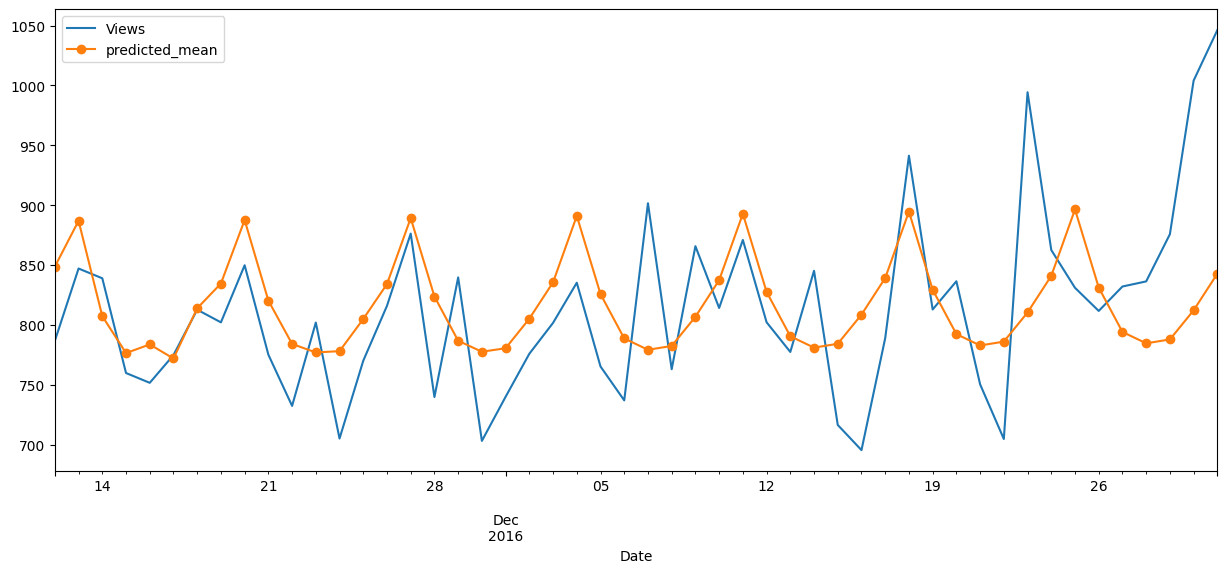

In [60]:
model = SARIMAX(train_x, order=(1,1,1), seasonal_order=(1,1,1,7))
model = model.fit(disp=False)
Pred = model.forecast(steps=50)
performance(test_x, Pred)
final_df.tail(50).plot()
Pred.plot(style='-o')
plt.legend();

###SARIMA model is able to predict the data with an MAPE of 6.4%.

##Using exogenous variable in SARIMAX model

In [61]:
exog_df.shape

(550, 1)

In [62]:
ex=exog_df['Exog'].to_numpy()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAE : 53.277
RMSE : 68.813
MAPE: 0.064


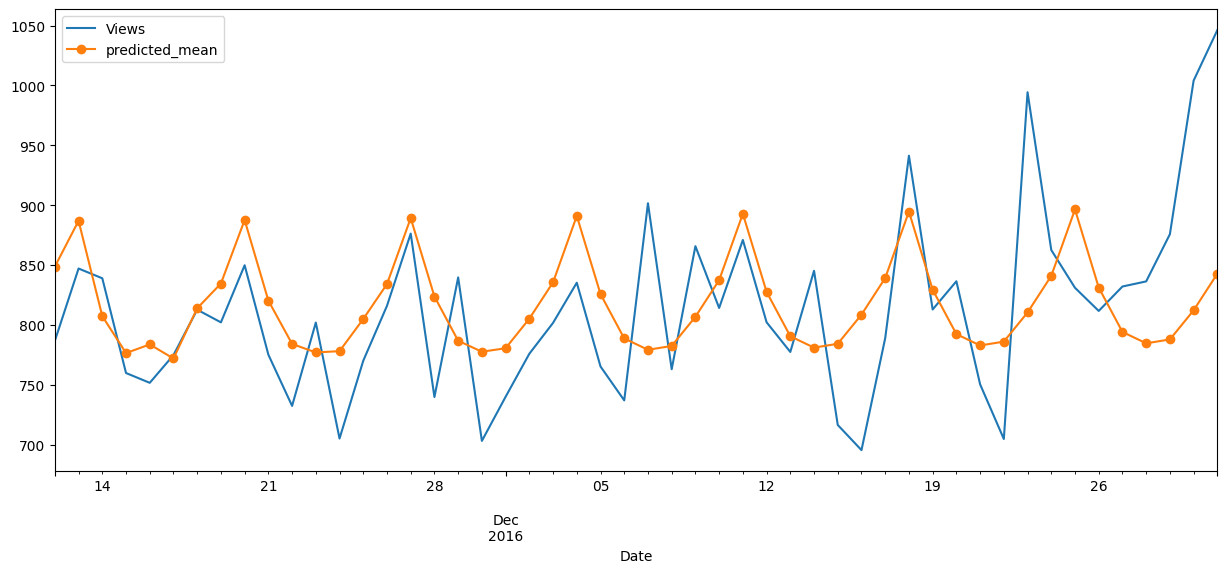

In [63]:
model = SARIMAX(train_x, order=(1,1,1), seasonal_order=(1,1,1,7), ex = ex)
model = model.fit(disp=False)
Pred = model.forecast(steps=50)
performance(test_x, Pred)
final_df.tail(50).plot()
Pred.plot(style='-o')
plt.legend();

##Applying the SARIMAX model for remaining top 3 languages: zh - Chinese, de - German, es - Spanish

In [71]:
#df.index.freq = pd.infer_freq(df.index)
lang_list = ['zh', 'de', 'es']

In [75]:
best_params = {}  # Dictionary to store the best parameters and lowest MAPE

for l in lang_list:
    # Form a dataframe for the given language
    final_df = df_lang[[l]].rename(columns={l: "Views"}).reset_index()
    final_df.columns = ["Date", "Views"]
    final_df["Date"] = pd.to_datetime(final_df["Date"])
    final_df.set_index("Date", inplace=True)
    final_df.index.freq = pd.infer_freq(final_df.index)

    # Handle missing values and outliers
    final_df["Views"] = final_df["Views"].interpolate(method="linear")
    final_df["Views"] = final_df["Views"].clip(
        upper=final_df["Views"].quantile(0.98), lower=final_df["Views"].quantile(0.02)
    )

    # Split data into training and testing
    train_x = final_df.iloc[:-50].copy()
    test_x = final_df.iloc[-50:].copy()

    order_list = [[0,1,0], [1,1,1], [1,2,1], [2,1,1], [1,2,2]]
    s_order_list = [[1,1,1,7], [1,2,1,7], [2,1,1,7]]

    print("-------------------------------------")
    print("Language:", l)

    # Initialize best tracking variables
    best_mape = float("inf")
    best_order, best_s_order = [], []

    for order in order_list:
        for s_order in s_order_list:
            model = SARIMAX(train_x, order=order, seasonal_order=s_order)
            model = model.fit(disp=False)
            Pred = model.forecast(steps=50)

            # Calculate MAPE
            mape_score = performance_1(test_x, Pred)

            print("-------------------------------------")
            print(order, s_order, "→ MAPE:", mape_score)

            # Store the best parameters for this language
            if mape_score < best_mape:
                best_mape = mape_score
                best_order, best_s_order = order, s_order

    # Save best parameters for this language
    best_params[l] = {
        "best_order": best_order,
        "best_s_order": best_s_order,
        "best_mape": best_mape
    }

# Print the best parameters for all languages
print("\nBest Parameters for Each Language:")
for lang, params in best_params.items():
    print(f"{lang}: Order={params['best_order']}, S_Order={params['best_s_order']}, MAPE={params['best_mape']}")


-------------------------------------
Language: zh
-------------------------------------
[0, 1, 0] [1, 1, 1, 7] → MAPE: 0.103
-------------------------------------
[0, 1, 0] [1, 2, 1, 7] → MAPE: 0.361
-------------------------------------
[0, 1, 0] [2, 1, 1, 7] → MAPE: 0.106
-------------------------------------
[1, 1, 1] [1, 1, 1, 7] → MAPE: 0.084
-------------------------------------
[1, 1, 1] [1, 2, 1, 7] → MAPE: 0.075


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-------------------------------------
[1, 1, 1] [2, 1, 1, 7] → MAPE: 0.083
-------------------------------------
[1, 2, 1] [1, 1, 1, 7] → MAPE: 0.089
-------------------------------------
[1, 2, 1] [1, 2, 1, 7] → MAPE: 0.4
-------------------------------------
[1, 2, 1] [2, 1, 1, 7] → MAPE: 0.094
-------------------------------------
[2, 1, 1] [1, 1, 1, 7] → MAPE: 0.084
-------------------------------------
[2, 1, 1] [1, 2, 1, 7] → MAPE: 0.074
-------------------------------------
[2, 1, 1] [2, 1, 1, 7] → MAPE: 0.084
-------------------------------------
[1, 2, 2] [1, 1, 1, 7] → MAPE: 0.065
-------------------------------------
[1, 2, 2] [1, 2, 1, 7] → MAPE: 0.406
-------------------------------------
[1, 2, 2] [2, 1, 1, 7] → MAPE: 0.065
-------------------------------------
Language: de
-------------------------------------
[0, 1, 0] [1, 1, 1, 7] → MAPE: 0.146
-------------------------------------
[0, 1, 0] [1, 2, 1, 7] → MAPE: 0.405
-------------------------------------
[0, 1, 0] [2,

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-------------------------------------
[2, 1, 1] [1, 2, 1, 7] → MAPE: 0.09
-------------------------------------
[2, 1, 1] [2, 1, 1, 7] → MAPE: 0.08
-------------------------------------
[1, 2, 2] [1, 1, 1, 7] → MAPE: 0.138
-------------------------------------
[1, 2, 2] [1, 2, 1, 7] → MAPE: 0.461
-------------------------------------
[1, 2, 2] [2, 1, 1, 7] → MAPE: 0.134
-------------------------------------
Language: es
-------------------------------------
[0, 1, 0] [1, 1, 1, 7] → MAPE: 0.279
-------------------------------------
[0, 1, 0] [1, 2, 1, 7] → MAPE: 0.412
-------------------------------------
[0, 1, 0] [2, 1, 1, 7] → MAPE: 0.295
-------------------------------------
[1, 1, 1] [1, 1, 1, 7] → MAPE: 0.251
-------------------------------------
[1, 1, 1] [1, 2, 1, 7] → MAPE: 0.411
-------------------------------------
[1, 1, 1] [2, 1, 1, 7] → MAPE: 0.239
-------------------------------------
[1, 2, 1] [1, 1, 1, 7] → MAPE: 0.257
-------------------------------------
[1, 2, 1] [1,

In [82]:
plt.rcParams['figure.figsize'] = (10, 5)

Language -  zh  Best params =  [1, 2, 2]   [1, 1, 1, 7]
Language -  de  Best params =  [2, 1, 1]   [1, 1, 1, 7]


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Language -  es  Best params =  [1, 1, 1]   [2, 1, 1, 7]


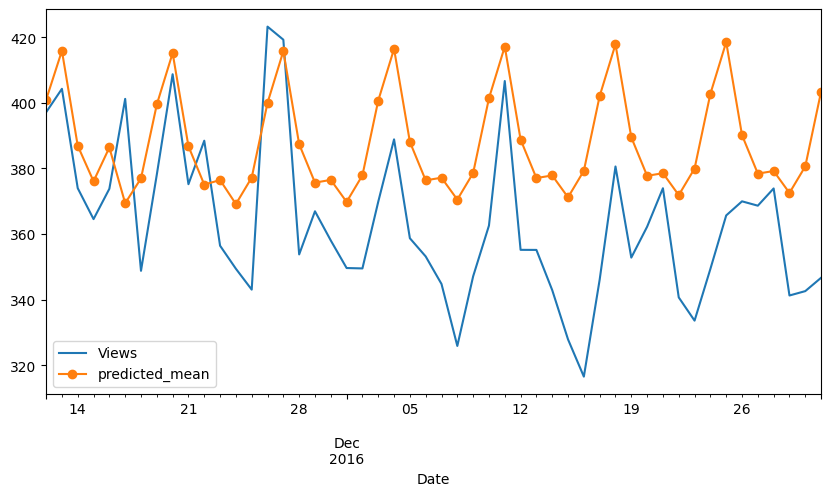

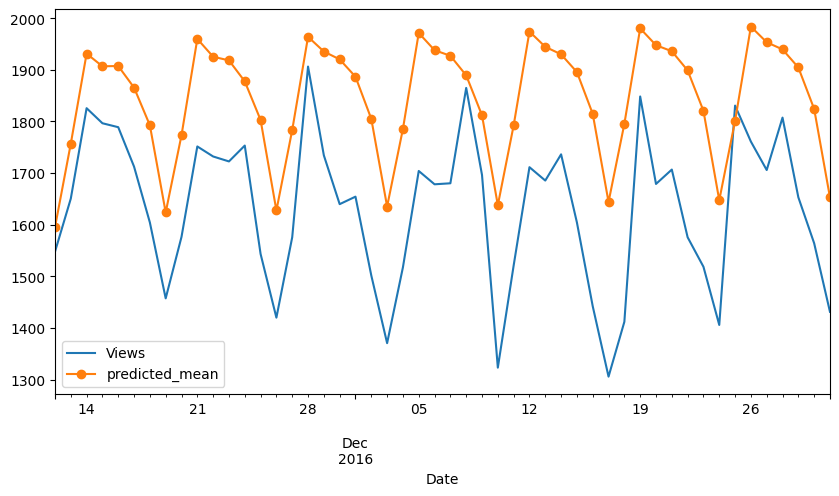

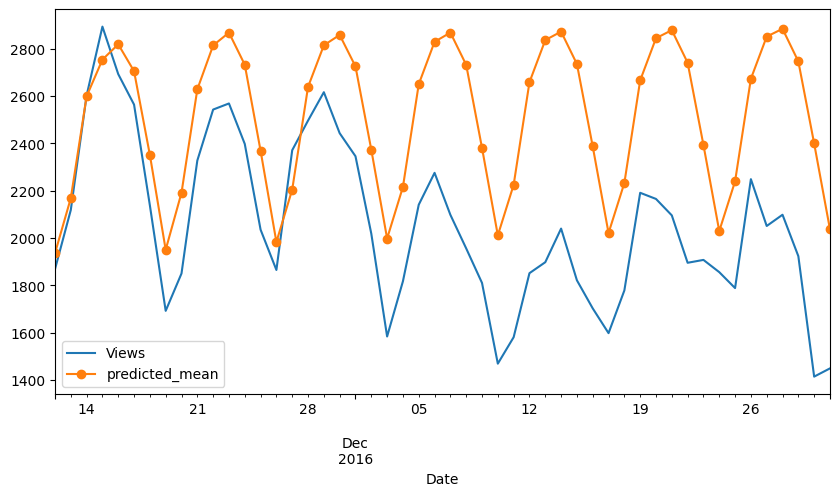

In [83]:
for l in lang_list:
    # Form a dataframe for the given language
    final_df = df_lang[[l]].rename(columns={l: "Views"}).reset_index()
    final_df.columns = ["Date", "Views"]
    final_df["Date"] = pd.to_datetime(final_df["Date"])
    final_df.set_index("Date", inplace=True)
    final_df.index.freq = pd.infer_freq(final_df.index)

    # # Handle missing values and outliers
    # final_df["Views"] = final_df["Views"].interpolate(method="linear")
    # final_df["Views"] = final_df["Views"].clip(
    #     upper=final_df["Views"].quantile(0.98), lower=final_df["Views"].quantile(0.02)
    # )

    # Split data into training and testing
    train_x = final_df.iloc[:-50].copy()
    test_x = final_df.iloc[-50:].copy()

    print("Language - ", l, " Best params = ",best_params[l]["best_order"]," ", best_params[l]["best_s_order"] )
    model = SARIMAX(train_x, order=best_params[l]["best_order"], seasonal_order=best_params[l]["best_s_order"], ex = ex)
    model = model.fit(disp=False)
    Pred = model.forecast(steps=50)
    #performance(test_x, Pred)
    #plt.title("Predictions for language {}".format(l))
    final_df.tail(50).plot()
    Pred.plot(style='-o')
    plt.legend();

##FB Prophet

In [84]:
!pip install --upgrade setuptools wheel
!pip install pystan==2.19.1.1 fbprophet

  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Preparing metadata (setup.py) ... done
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl.metadata (2.9 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl.metadata (6.3 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached PyMeeus-0.5.12-py3-none-any.whl
  Using cached ephem-4.1.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.0 kB)
Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
Using cached ephem-4.1.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist

In [86]:
!pip install prophet

In [88]:
from prophet import Prophet

# Test Prophet model creation
model = Prophet()
print("Prophet installed successfully!")

Prophet installed successfully!


In [90]:
# Form a dataframe for the given language
final_df = df_lang['ja'].reset_index()
final_df.columns = ["ds", "y"]
final_df["ds"] = pd.to_datetime(final_df["ds"])

In [91]:
final_df['exog'] = ex

In [92]:
final_df.head()

,ds,y,exog
0,2015-07-01,625.480747,0
1,2015-07-02,727.903968,0
2,2015-07-03,643.385358,0
3,2015-07-04,777.382315,0
4,2015-07-05,727.564548,0


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppgtlhymm/1rm2ceye.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppgtlhymm/3i4wi_pe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93301', 'data', 'file=/tmp/tmppgtlhymm/1rm2ceye.json', 'init=/tmp/tmppgtlhymm/3i4wi_pe.json', 'output', 'file=/tmp/tmppgtlhymm/prophet_modelccw32y8z/prophet_model-20250210043805.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:38:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:38:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


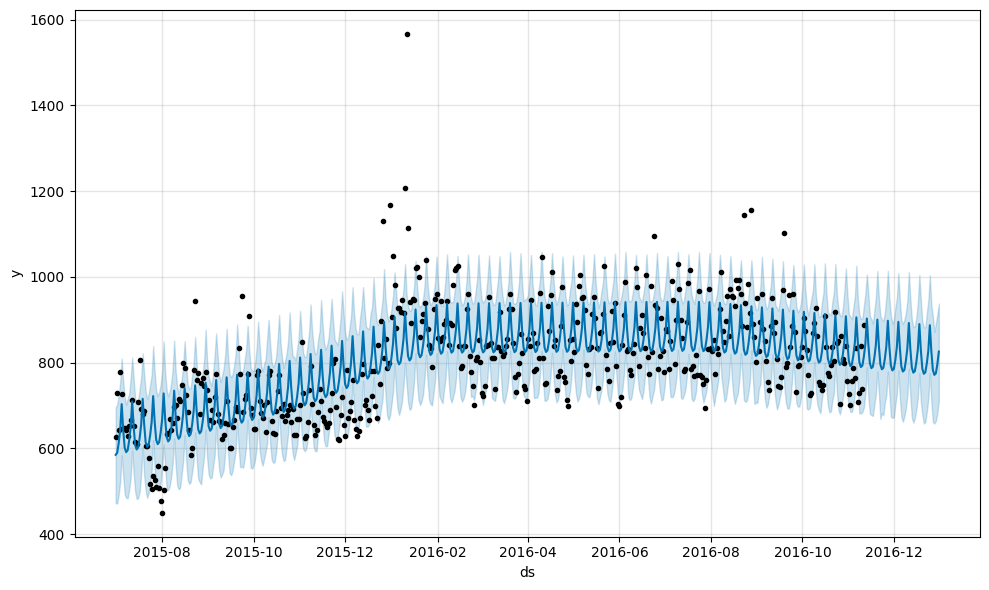

In [94]:
m = Prophet(weekly_seasonality=True)
m.fit(final_df[['ds','y']][:-50])
future = m.make_future_dataframe(periods=50,freq="D")
forecast = m.predict(future)
fig = m.plot(forecast)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppgtlhymm/8qoqp6p5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppgtlhymm/txw6o66q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69532', 'data', 'file=/tmp/tmppgtlhymm/8qoqp6p5.json', 'init=/tmp/tmppgtlhymm/txw6o66q.json', 'output', 'file=/tmp/tmppgtlhymm/prophet_model_orx8tud/prophet_model-20250210044120.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:41:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:41:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


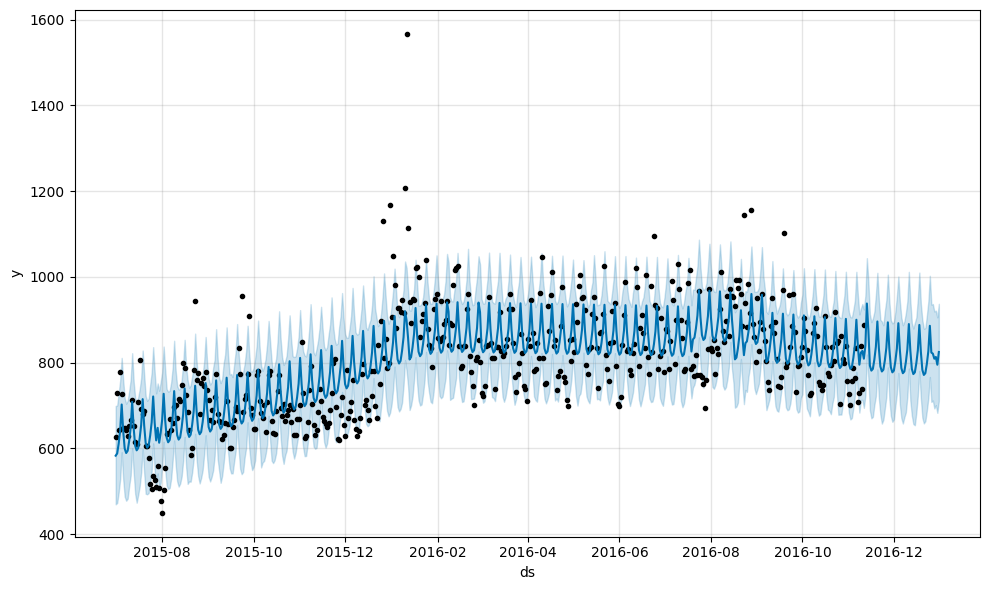

In [97]:
prophet2 = Prophet(weekly_seasonality=True)
prophet2.add_regressor('exog')
prophet2.fit(final_df[:-50])
forecast2 = prophet2.predict(final_df)
fig2 = prophet2.plot(forecast2)

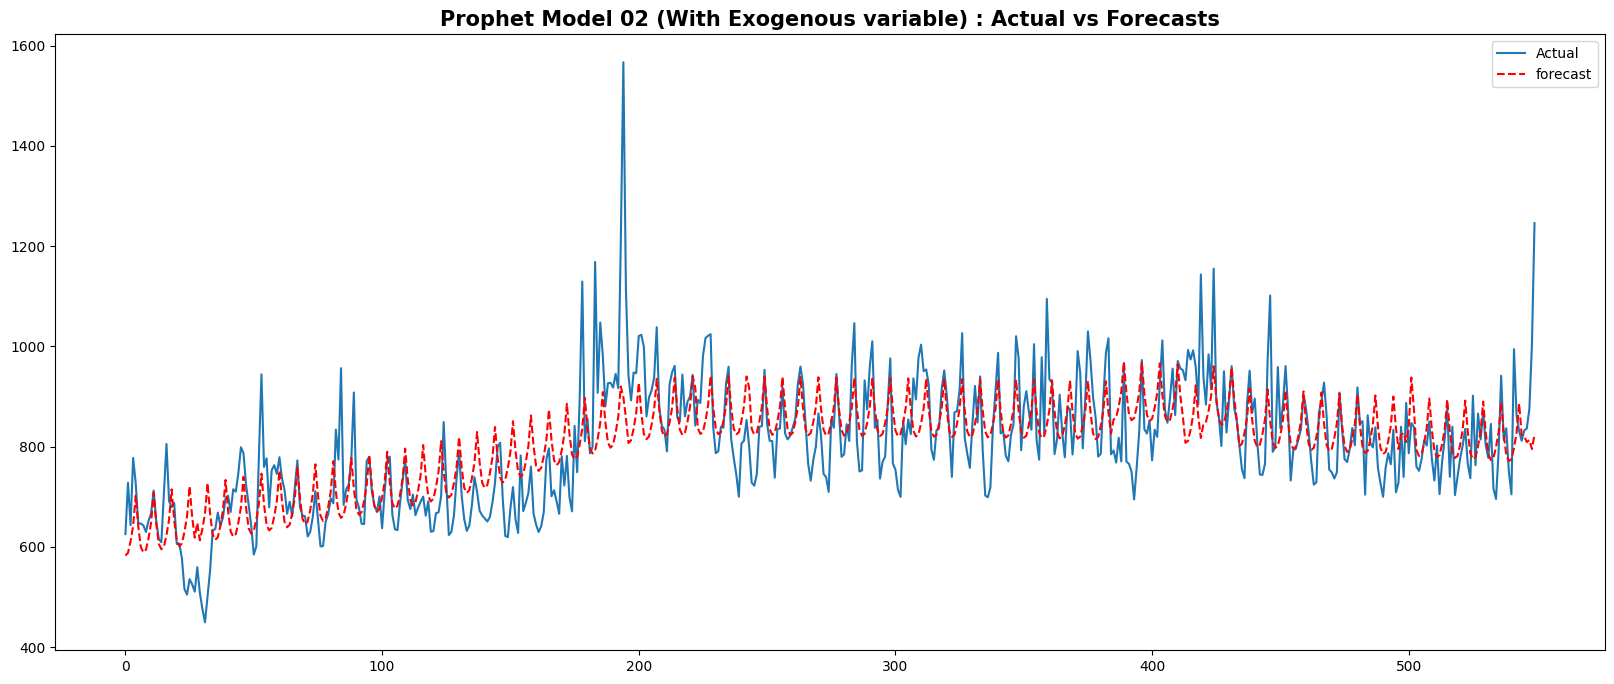

In [98]:
actual = final_df['y'].values
forecast = forecast2['yhat'].values

plt.figure(figsize = (20,8))
plt.plot(actual, label = 'Actual')
plt.plot(forecast, label = 'forecast', color = 'red', linestyle='dashed')
plt.legend(loc="upper right")
plt.title(f'Prophet Model 02 (With Exogenous variable) : Actual vs Forecasts', fontsize = 15, fontweight = 'bold')
plt.show()

##INFERENCES



*   Japenese language has highest pages so ad placements on these pages will be beneficial.
*   There are more number of web pages in Jaoenese language. The more numer of vews are seen for the Spanish Language.



Questionnaire:
Defining the problem statements and where can this and modifications of this be used?
Write 3 inferences you made from the data visualizations
What does the decomposition of series do?
What level of differencing gave you a stationary series?
Difference between arima, sarima & sarimax.
Compare the number of views in different languages
What other methods other than grid search would be suitable to get the model for all languages?

##Questionnaire

- 1) Defining the problem statements and where can this and modifications of this be used?
- Ans) This problem statement tries to understand the per page view report for different wikipedia pages for 550 days, and forecast the number of views so that we can predict and optimize the ad placement. This concept can be used in variety of applications such as stock price prediction, weather forecasting, demand forecasting, anomaly detection and so on.

- 2) Write 3 inferences you made from the data visualizations.
- Ans) fron the various visualizations we can observe that:

1.   Of total of arounf 14000 different languages, the most popular language is the Japenese lanuage.
2.   japenese accounts for 13.018139 % of the total web pages followed by Chinese -zh	10.169659 % and German - de	5.2886195%.
3.   Most occuring Access types are all-access followed by desktop and mobile-web and so on.



- 3) What does the decomposition of series do?
-Ans) Decomposition of a time series breaks it into trend, seasonality, and residual (noise) components. The trend shows the overall direction of the series over time. Seasonality captures repeating patterns at fixed intervals (e.g., daily, weekly, yearly). The residual represents random fluctuations that cannot be explained by trend or seasonality. This helps in understanding patterns, detecting anomalies, and improving forecasting models.

- 4 ) What level of differencing gave you a stationary series?
- Ans) Differencing of level 1 gave the stationary series.

- 5)  Difference between arima, sarima & sarimax.
- Ans )

1.   ARIMA (AutoRegressive Integrated Moving Average) models univariate time series data by combining autoregression, differencing, and moving averages. ARIMA models are denoted by the notations ARIMA(p, d, q), where p is the order of the autoregression component, d is the order of differencing used to make the time series stationary, and q is the order of the moving average component.
2.    SARIMA (Seasonal ARIMA) extends ARIMA by incorporating seasonal components, allowing it to capture seasonal patterns in the data. SARIMAX (Seasonal ARIMA with eXogenous variables) is an extension of SARIMA that includes external explanatory variables (exogenous variables) to enhance forecasting accuracy. ARIMA is suitable for non-seasonal data, while SARIMA handles seasonality. SARIMA models are denoted by the notations SARIMA(p, d, q)(P, D, Q, S), where p, d, and q are the same as in ARIMA models, P is the order of the seasonal autoregression component, D is the order of seasonal differencing, Q is the order of the seasonal moving average component, and S is the number of seasons in the data.
3.   In SARIMAX  X stands for the exogenous variable that is the external factor that influence the time series, improving the model's predictive power. SARIMAX models are denoted by the notations SARIMAX(p, d, q)(P, D, Q, S)x, where p, d, q, P, D, Q, and S are the same as in SARIMA models and x represents the number of exogenous variables included in the model.



- 6) Compare the number of views in different languages.
- Ans) If we compare the views of different pages, we observe that the number of views are maximum for Spanish followed by German and then Japenese.


- 7) What other methods other than grid search would be suitable to get the model for all languages?
- Ans) Apart from the grid search method, the library pmdarima can also be useful to get the best parameters for the model and gte the final model for various languages.
-The ACF and the PACF graphs also indicates what best parameter values can be used.